In [7]:
from TP import TP

Thermo = TP(time_step=1, duration=1500, loop_rate=20)


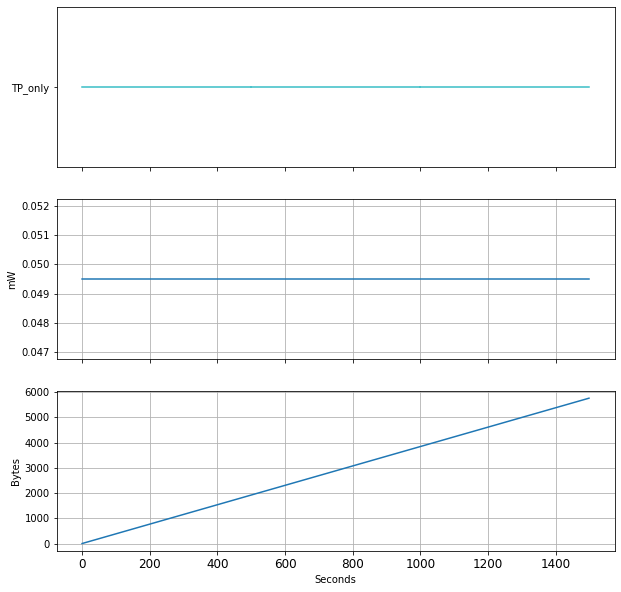

1

In [8]:
active_times = [(0,500,"TP_only"), (500,1000,"TP_only"), (1000,1500,"TP_only")]
Thermo.runSim(active_times)

[(0, 15, 'TP_only'), (15, 30, 'TP_only'), (30, 45, 'TP_only'), (45, 60, 'TP_only'), (60, 75, 'TP_only'), (75, 90, 'TP_only'), (90, 105, 'TP_only'), (105, 120, 'TP_only'), (120, 135, 'TP_only'), (135, 150, 'TP_only'), (150, 165, 'TP_only'), (165, 180, 'TP_only'), (180, 195, 'TP_only'), (195, 210, 'TP_only'), (210, 225, 'TP_only'), (225, 240, 'TP_only'), (240, 255, 'TP_only'), (255, 270, 'TP_only'), (270, 285, 'TP_only'), (285, 300, 'TP_only'), (300, 315, 'TP_only'), (315, 330, 'TP_only'), (330, 345, 'TP_only'), (345, 360, 'TP_only'), (360, 375, 'TP_only'), (375, 390, 'TP_only'), (390, 405, 'TP_only'), (405, 420, 'TP_only'), (420, 435, 'TP_only'), (435, 450, 'TP_only'), (450, 465, 'TP_only'), (465, 480, 'TP_only'), (480, 495, 'TP_only'), (495, 510, 'TP_only'), (510, 525, 'TP_only'), (525, 540, 'TP_only'), (540, 555, 'TP_only'), (555, 570, 'TP_only'), (570, 585, 'TP_only'), (585, 600, 'TP_only'), (600, 615, 'TP_only'), (615, 630, 'TP_only'), (630, 645, 'TP_only'), (645, 660, 'TP_only'), (

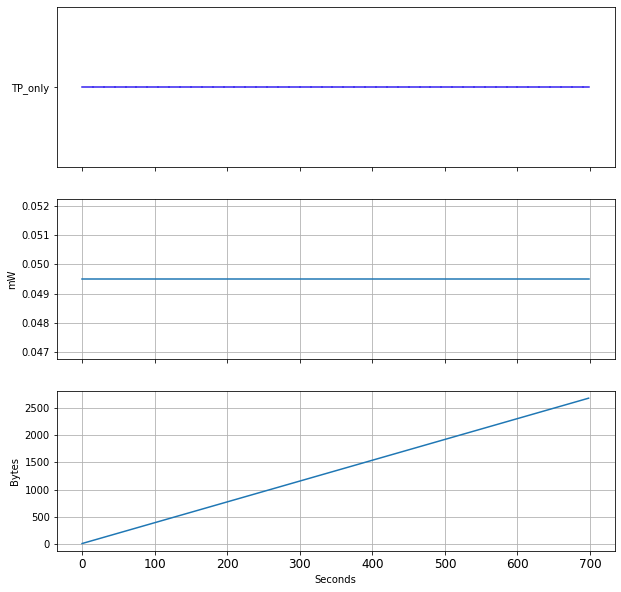

1

In [9]:
def generateActiveList(total_time: float, modedict:dict, **kwargs) -> list:
    #frequency should be in hz. duration should be in seconds
    finalArr = []
    curTime = 0
    flag = False
    while curTime < total_time:
        for key in modedict:
            if curTime+modedict[key]>total_time:
                flag = True
                break
            finalArr.append((curTime, curTime+modedict[key], key))
            curTime += modedict[key]
        if flag: 
            break
    mode = len(finalArr) % len(modedict)
    if finalArr[-1][1] > total_time:
        finalArr[-1] = (finalArr[-1][0], total_time, list(modedict.keys())[mode])
    elif finalArr[-1][1] < total_time:
        finalArr.append((finalArr[-1][1], total_time, list(modedict.keys())[mode]))
    print(finalArr)
    return finalArr

modedict = {"TP_only":15, "TP_only":15,"TP_only":15}
active_times = generateActiveList(total_time=699, modedict=modedict)
Thermo2 = TP(time_step=1, duration=699, loop_rate=20, digital_low_pass=0, sample_rate_divisor=0)

Thermo2.runSim(active_times)


